# FINAL PROJECT

## Sentiment Analysis on Cryptocurrency vs. Open Banking vs. Banking

### Data Prep/Cleanup for Sentiment Analysis

In [81]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from pathlib import Path

# For Sentiment Analysis
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

# For Tokenizing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# For Ngrams
from collections import Counter
from nltk import ngrams
from nltk.util import ngrams

# For Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 5.0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\piercerachel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piercerachel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piercerachel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\piercerachel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
# Read api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [83]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [84]:
# Part 1
# Fetch the cryptocurrency news articles
crypto_news = newsapi.get_everything(
    q="cryptocurrency",
    language="en"
)

# Show the total number of news
crypto_news["totalResults"]

10785

In [85]:
# Export text to txt file for later use in AWS Comprehend
data_crypto = crypto_news["articles"]

all_content_crypto = []
for i in data_crypto:
    print(i["content"])
    all_content_crypto.append(i["content"])
    
filename = 'project3crypto.txt'
file_write = "C:/Users/piercerachel/Desktop/git/Project3/project3crypto.txt"

with open(file_write, 'w') as f:
    f.write(f"{all_content_crypto}\n")
    for item in all_content_crypto.append(i["content"]):
        f.write(item+"\n")

British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved cohort: Bitcoin billionaires who want to buy a house.
In October, Poulde… [+3364 chars]
El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge

 

 The International Monetary Fund’s executive board has recommended El … [+2691 chars]
On Tuesday, Ilya Lichtenstein and Heather Morgan were arrested in New York and accused of laundering a record $4.5 billion dollars worth of stolen cryptocurrency. In the 24 hours since, the cybersecu… [+4297 chars]
Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]
On February 3, the group started accepting ether donations on crypto crowdfunding platform Juicebox, eventually raising some $52 million. In e

TypeError: 'NoneType' object is not iterable

In [86]:
# Create the Crypto sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [87]:
# Preview dataframe
crypto_df = create_df(crypto_news["articles"], "en")
crypto_df.head()

,title,description,text,date,language
0,Gibraltar Could Launch the World’s First Crypt...,“The Rock” hopes a new stock exchange will att...,British entrepreneur and financier Richard ODe...,2022-01-26,en
1,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,en
2,The DOJ's $3.6B Seizure Shows How Hard It Is t...,A couple allegedly used a “laundry list” of te...,"On Tuesday, Ilya Lichtenstein and Heather Morg...",2022-02-09,en
3,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,2022-02-09,en
4,Assange's NFT Clock Sale Rides a Wave of DAO C...,The WikiLeaks founder raised $50 million for l...,"On February 3, the group started accepting eth...",2022-02-09,en


In [88]:
# Describe the Crypto Sentiment
# First get the sentiment calculation
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [89]:
# Second get the Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in crypto_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Crypto DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
crypto_df = crypto_df.join(title_sentiment_df).join(text_sentiment_df)

crypto_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Gibraltar Could Launch the World’s First Crypt...,“The Rock” hopes a new stock exchange will att...,British entrepreneur and financier Richard ODe...,2022-01-26,en,0.0000,0.000,1.000,0.000,0,0.6808,0.185,0.815,0.000,1
1,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,en,0.1280,0.103,0.897,0.000,1,0.3182,0.105,0.895,0.000,1
2,The DOJ's $3.6B Seizure Shows How Hard It Is t...,A couple allegedly used a “laundry list” of te...,"On Tuesday, Ilya Lichtenstein and Heather Morg...",2022-02-09,en,-0.1027,0.000,0.887,0.113,-1,-0.7650,0.048,0.736,0.216,-1
3,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,2022-02-09,en,0.0000,0.000,1.000,0.000,0,0.5859,0.124,0.876,0.000,1
4,Assange's NFT Clock Sale Rides a Wave of DAO C...,The WikiLeaks founder raised $50 million for l...,"On February 3, the group started accepting eth...",2022-02-09,en,0.0000,0.000,1.000,0.000,0,0.3818,0.082,0.918,0.000,1


In [90]:
# Part 2
# Fetch the open banking news articles
openbanking_news = newsapi.get_everything(
    q="open banking",
    language="en"
)

# Show the total number of news
openbanking_news["totalResults"]

3021

In [92]:
# export text to txt file for later use in AWS Comprehend
data_open = openbanking_news["articles"]

all_content_open = []
for i in data2:
    print(i["content"])
    all_content_open.append(i["content"])
    
filename = 'project3openbanking.txt'
file_write = "C:/Users/piercerachel/Desktop/git/Project3/project3openbanking.txt"

with open(file_write, 'w') as f:
    f.write(f"{all_content_open}\n")
    for item in all_content_open.append(i["content"]):
        f.write(item+"\n")

BENGALURU, Feb 18 (Reuters) - Indian shares edged lower on Friday, pressured by IT and banking stocks, with investors focused on the East-West standoff over Ukraine, which has roiled markets this wee… [+874 chars]
Although the UK pioneered open-
banking regulations (and popularized the term), Finicity CEO Steve Smith contends that the US has long been the engine of innovation driving the space forward.
In a … [+2619 chars]
ADDIS ABABA, Feb 22 (Reuters) - Ethiopia plans to open up its banking industry to foreign competition as soon as parliament passes policies permitting it, Prime Minister Abiy Ahmed said, flagging ref… [+1159 chars]
Relationship banking is a term you'll frequently find in many brick-and-mortar banks or national banks. If you're looking at the interest rates of a savings account, you might see relationship rates … [+3055 chars]
Customers of the UKs biggest banks and building societies will be able to continue to use Post Office counters to pay in and withdraw cash, aft

TypeError: 'NoneType' object is not iterable

In [93]:
# Create the Open Banking sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [94]:
# Preview dataframe
openbanking_df = create_df(openbanking_news["articles"], "en")
openbanking_df.head()

,title,description,text,date,language
0,"Indian shares open lower as IT, banks weigh - ...","Indian shares edged lower on Friday, pressured...","BENGALURU, Feb 18 (Reuters) - Indian shares ed...",2022-02-18,en
1,"Finicity co-founder talks open banking, fintec...",Finicity CEO Steve Smith talks about how socia...,Although the UK pioneered open-\r\nbanking reg...,2022-02-04,en
2,Ethiopia's Abiy tells banking sector to get re...,Ethiopia plans to open up its banking industry...,"ADDIS ABABA, Feb 22 (Reuters) - Ethiopia plans...",2022-02-22,en
3,"Relationship banking can offer special perks, ...",Banks use relationship banking to build relati...,Relationship banking is a term you'll frequent...,2022-02-04,en
4,Deal renewed for banking customers to use Post...,‘Lifeline’ agreement confirmed for millions wh...,Customers of the UKs biggest banks and buildin...,2022-01-31,en


In [95]:
# Describe the Open Banking Sentiment
# First get the sentiment calculation
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [96]:
# Second get the Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in openbanking_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Open Banking DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
openbanking_df = openbanking_df.join(title_sentiment_df).join(text_sentiment_df)

openbanking_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"Indian shares open lower as IT, banks weigh - ...","Indian shares edged lower on Friday, pressured...","BENGALURU, Feb 18 (Reuters) - Indian shares ed...",2022-02-18,en,0.0000,0.177,0.645,0.177,0,0.1779,0.127,0.765,0.108,1
1,"Finicity co-founder talks open banking, fintec...",Finicity CEO Steve Smith talks about how socia...,Although the UK pioneered open-\r\nbanking reg...,2022-02-04,en,0.5106,0.292,0.708,0.000,1,0.6705,0.151,0.849,0.000,1
2,Ethiopia's Abiy tells banking sector to get re...,Ethiopia plans to open up its banking industry...,"ADDIS ABABA, Feb 22 (Reuters) - Ethiopia plans...",2022-02-22,en,0.3612,0.185,0.815,0.000,1,0.0000,0.000,1.000,0.000,0
3,"Relationship banking can offer special perks, ...",Banks use relationship banking to build relati...,Relationship banking is a term you'll frequent...,2022-02-04,en,0.4939,0.208,0.792,0.000,1,0.4588,0.091,0.909,0.000,1
4,Deal renewed for banking customers to use Post...,‘Lifeline’ agreement confirmed for millions wh...,Customers of the UKs biggest banks and buildin...,2022-01-31,en,0.0000,0.000,1.000,0.000,0,0.1027,0.050,0.912,0.039,1


In [97]:
# Part 3
# Fetch the banking news articles
banking_news = newsapi.get_everything(
    q="banking",
    language="en"
)

# Show the total number of news
banking_news["totalResults"]

14980

In [98]:
# export text to txt file for later use in AWS Comprehend
data_banking = banking_news["articles"]

all_content_banking = []
for i in data_banking:
    print(i["content"])
    all_content_banking.append(i["content"])
       
filename = 'project3banking.txt'
file_write = "C:/Users/piercerachel/Desktop/git/Project3/project3banking.txt"

with open(file_write, 'w') as f:
    f.write(f"{all_content_banking}\n")
    for item in all_content_banking.append(i["content"]):
        f.write(item+"\n")  

Our Banking CMO Report synthesizes interviews with 10 CMOs at some of the largest and most innovative banks, credit unions, and neobanks in the US and Canada.
Through our exclusive interviews, we pr… [+468 chars]
The news: US 
neobank SoFi has agreed to acquire Technisys, a cloud-based core-banking provider. The tie-up is valued at around $1.1 billion and is slated to close in Q2 2022.
… [+2943 chars]gence
… [+1061 chars]28 (Reuters) - Indian shares rose on Friday, lifted by energy and banking stocks amid strong earnings momentum, while a slight rebound in global markets also aided investor sentiment.
Jan 25 - Welcome to the home for real-time coverage of markets brought to you by Reuters reporters. You can share your thoughts with us at markets.research@thomsonreuters.com
BANKING ON BANKS IN 202… [+13700 chars]
Feb 7 (Reuters) - Australian shares slipped on Monday, as losses in the banking and healthcare sectors offset gains made by energy and mining firms, while travel stocks gained 

TypeError: 'NoneType' object is not iterable

In [99]:
# Create the Banking sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [100]:
# Preview dataframe
banking_df = create_df(banking_news["articles"], "en")
banking_df.head()

,title,description,text,date,language
0,The Banking CMO Report Preview,Get an exclusive preview of the Banking CMO Re...,Our Banking CMO Report synthesizes interviews ...,2022-02-08,en
1,SoFi's Technisys deal moves it closer to a 'on...,US neobank SoFi plans to acquire cloud-based c...,The news: US \r\nneobank SoFi has agreed to ac...,2022-02-23,en
2,"India shares gain on energy, banking boost - R...","Indian shares rose on Friday, lifted by energy...","BENGALURU, Jan 28 (Reuters) - Indian shares ro...",2022-01-28,en
3,LIVE MARKETS Banking on banks in 2022 - Reuters,Welcome to the home for real-time coverage of ...,Jan 25 - Welcome to the home for real-time cov...,2022-01-25,en
4,"Australian shares weighed down by banking, hea...","Australian shares slipped on Monday, as losses...",Feb 7 (Reuters) - Australian shares slipped on...,2022-02-07,en


In [101]:
# Describe the Banking Sentiment
# First get the sentiment calculation
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [102]:
# Second get the Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in banking_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Open Banking DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
banking_df = banking_df.join(title_sentiment_df).join(text_sentiment_df)

banking_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,The Banking CMO Report Preview,Get an exclusive preview of the Banking CMO Re...,Our Banking CMO Report synthesizes interviews ...,2022-02-08,en,0.0000,0.000,1.000,0.0,0,0.7620,0.191,0.809,0.000,1
1,SoFi's Technisys deal moves it closer to a 'on...,US neobank SoFi plans to acquire cloud-based c...,The news: US \r\nneobank SoFi has agreed to ac...,2022-02-23,en,0.0000,0.000,1.000,0.0,0,0.7964,0.213,0.787,0.000,1
2,"India shares gain on energy, banking boost - R...","Indian shares rose on Friday, lifted by energy...","BENGALURU, Jan 28 (Reuters) - Indian shares ro...",2022-01-28,en,0.8555,0.722,0.278,0.0,1,0.7650,0.213,0.787,0.000,1
3,LIVE MARKETS Banking on banks in 2022 - Reuters,Welcome to the home for real-time coverage of ...,Jan 25 - Welcome to the home for real-time cov...,2022-01-25,en,0.0000,0.000,1.000,0.0,0,0.6369,0.144,0.856,0.000,1
4,"Australian shares weighed down by banking, hea...","Australian shares slipped on Monday, as losses...",Feb 7 (Reuters) - Australian shares slipped on...,2022-02-07,en,0.2960,0.216,0.784,0.0,1,0.6808,0.227,0.707,0.066,1


### Sentiment Analysis

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparison'}>

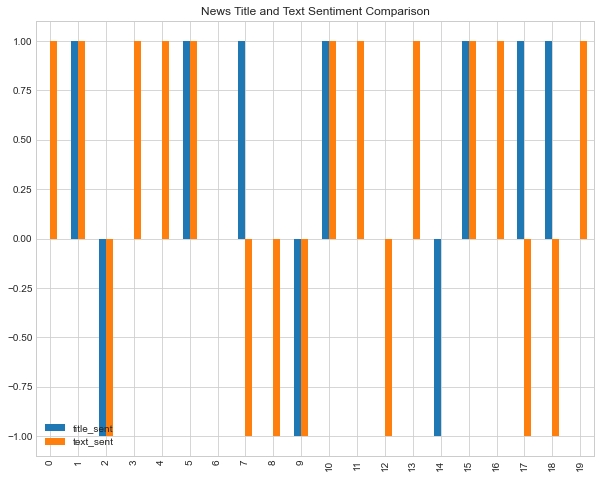

In [103]:
# Analyze Crypto Results:
crypto_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [104]:
# Get Stats on Crypto Dataframe
crypto_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.072060,0.078450,0.887900,0.033650,0.200000,0.134265,0.084100,0.872450,0.04345,0.200000
std,0.232018,0.119523,0.120482,0.076078,0.695852,0.434801,0.053947,0.070881,0.06401,0.951453
min,-0.340000,0.000000,0.656000,0.000000,-1.000000,-0.765000,0.000000,0.729000,0.00000,-1.000000
25%,0.000000,0.000000,0.807000,0.000000,0.000000,-0.225725,0.047250,0.833250,0.00000,-1.000000
50%,0.000000,0.000000,0.892000,0.000000,0.000000,0.334400,0.080000,0.885500,0.00000,1.000000
75%,0.109025,0.189000,1.000000,0.000000,1.000000,0.461975,0.124750,0.919000,0.08750,1.000000
max,0.636900,0.344000,1.000000,0.286000,1.000000,0.680800,0.185000,1.000000,0.21600,1.000000


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparison'}>

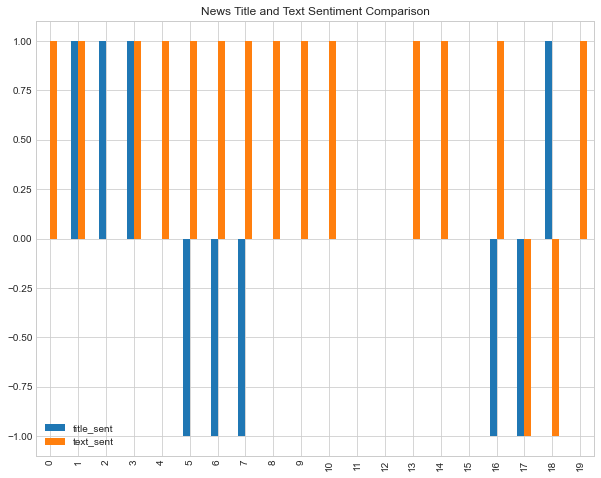

In [105]:
# Analyze Open Banking Results:
openbanking_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [106]:
# Get Stats on Open Banking Dataframe
openbanking_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.008170,0.090650,0.842750,0.066500,-0.050000,0.168185,0.066250,0.905600,0.028100,0.600000
std,0.301858,0.130003,0.179243,0.107786,0.686333,0.397770,0.060287,0.072657,0.060459,0.680557
min,-0.440400,0.000000,0.526000,0.000000,-1.000000,-0.812600,0.000000,0.765000,0.000000,-1.000000
25%,-0.060550,0.000000,0.692250,0.000000,-0.250000,0.000000,0.000000,0.848250,0.000000,0.000000
50%,0.000000,0.000000,0.920000,0.000000,0.000000,0.177900,0.057500,0.918000,0.000000,1.000000
75%,0.000000,0.168750,1.000000,0.164250,0.000000,0.369700,0.100000,0.950000,0.009750,1.000000
max,0.624900,0.459000,1.000000,0.308000,1.000000,0.700300,0.191000,1.000000,0.215000,1.000000


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparison'}>

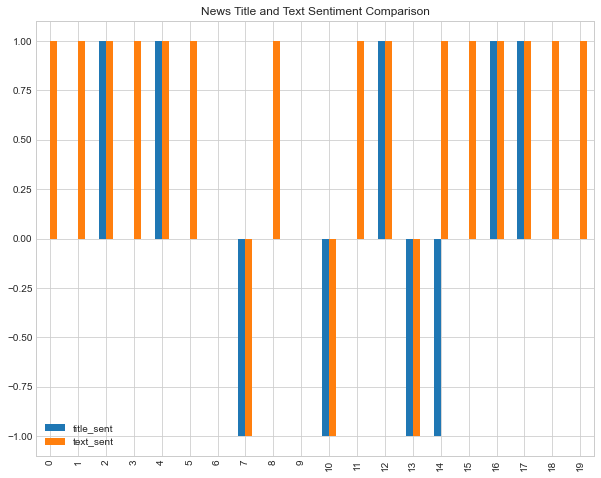

In [107]:
# Analyze Banking Results:
banking_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [108]:
# Get Stats on Banking Dataframe
banking_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.043935,0.107700,0.819300,0.07295,0.050000,0.356795,0.122700,0.840600,0.036750,0.600000
std,0.363203,0.186712,0.211574,0.13677,0.686333,0.432582,0.076537,0.081297,0.052773,0.753937
min,-0.612400,0.000000,0.278000,0.00000,-1.000000,-0.718400,0.000000,0.707000,0.000000,-1.000000
25%,0.000000,0.000000,0.644500,0.00000,0.000000,0.077025,0.072750,0.787000,0.000000,0.750000
50%,0.000000,0.000000,0.906500,0.00000,0.000000,0.517050,0.135500,0.826500,0.000000,1.000000
75%,0.074000,0.185500,1.000000,0.04425,0.250000,0.694375,0.191000,0.902250,0.070250,1.000000
max,0.855500,0.722000,1.000000,0.41200,1.000000,0.796400,0.231000,1.000000,0.176000,1.000000


### Sentiment Analysis Conclusions:

**Q: Which concept (Cryptocurrency, Open Banking, or Banking) had the highest mean positive score?**  

A: Crypto had the highest mean title_pos score of 0.7845, while Banking had the highest mean text_pos score of 0.1163. Open Banking had the lowest.  
Banking = mean title_pos 0.1077, mean text_pos 0.1163  
Open Banking = mean title_pos 0.0950, mean text_pos 0.0711  
Crypto = mean title_pos 0.7845, mean text_pos 0.0841  

**Q: Which concept had the highest compound score?**  

A: Banking had the highest title_compound score of 0.8555 and the highest text_compound score of 0.7650. Both Crypto and Open Banking had lower similar scores.  
Banking = max title_compound 0.8555, max text_compound 0.7650  
Open Banking = max title_compound 0.6249, max text_compound 0.7003  
Crypto = max title_compound 0.6369, max text_compound 0.6808  

**Q. Which concept had the highest positive score?**  

A: Banking had the highest title_pos score of 0.7222 and the highest text_pos score of 0.2310.  Crypto had the lowest.  
Banking = max title_pos 0.7222, max text_pos 0.2310  
Open Banking = max title_pos 0.4590, max text_pos 0.1910  
Crypto = max title_pos 0.3440, max text_pos 0.1850  
  
*Note: Answers based on 2/22/22 code results.  Data will change daily and describe graphs may reflect updated numbers in results above.*


## Natural Language Processing (Cryptocurrency vs. Open Banking vs. Banking)

In [109]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [110]:
# Extract Article Content For Easier Analysis
data_crypto = crypto_news["articles"]
data_open = openbanking_news["articles"]
data_banking = banking_news["articles"]

all_content_crypto = []
for i in data_crypto:
    #print(i["content"])
    all_content_crypto.append(i["content"])
    
all_content_open = []
for i in data_open:
    #print(i["content"])
    all_content_open.append(i["content"])
    
all_content_banking = []
for i in data_banking:
    #print(i["content"])
    all_content_banking.append(i["content"])

In [111]:
# Updating to string
all_content_crypto = str(all_content_crypto)
all_content_open = str(all_content_open)
all_content_banking = str(all_content_banking)

In [125]:
# View tokenized crypto-related words
words_crypto = word_tokenize(all_content_crypto)
print(words_crypto)

['[', "'British", 'entrepreneur', 'and', 'financier', 'Richard', 'ODell', 'Poulden', 'hopes', 'that', 'his', 'new', 'venture', 'will', 'relieve', 'the', 'plight', 'of', 'an', 'underserved', 'cohort', ':', 'Bitcoin', 'billionaires', 'who', 'want', 'to', 'buy', 'a', 'house.\\r\\nIn', 'October', ',', 'Poulde…', '[', '+3364', 'chars', ']', "'", ',', "'El", 'Salvador', 'introduced', 'Bitcoin', 'as', 'a', 'legal', 'tender', 'alongside', 'the', 'US', 'dollar', 'in', '2021', '.', '|', 'Illustration', 'by', 'Alex', 'Castro', '/', 'The', 'Verge\\r\\n\\n', '\\n\\n', 'The', 'International', 'Monetary', 'Fund', '’', 's', 'executive', 'board', 'has', 'recommended', 'El', '…', '[', '+2691', 'chars', ']', "'", ',', "'On", 'Tuesday', ',', 'Ilya', 'Lichtenstein', 'and', 'Heather', 'Morgan', 'were', 'arrested', 'in', 'New', 'York', 'and', 'accused', 'of', 'laundering', 'a', 'record', '$', '4.5', 'billion', 'dollars', 'worth', 'of', 'stolen', 'cryptocurrency', '.', 'In', 'the', '24', 'hours', 'since', ','

In [126]:
# View tokenized open banking-related words
words_open = word_tokenize(all_content_open)
print(words_open)

['[', "'BENGALURU", ',', 'Feb', '18', '(', 'Reuters', ')', '-', 'Indian', 'shares', 'edged', 'lower', 'on', 'Friday', ',', 'pressured', 'by', 'IT', 'and', 'banking', 'stocks', ',', 'with', 'investors', 'focused', 'on', 'the', 'East-West', 'standoff', 'over', 'Ukraine', ',', 'which', 'has', 'roiled', 'markets', 'this', 'wee…', '[', '+874', 'chars', ']', "'", ',', "'Although", 'the', 'UK\\xa0pioneered\\xa0open-\\r\\nbanking', 'regulations', '(', 'and', 'popularized', 'the', 'term', ')', ',', '\\xa0Finicity\\xa0CEO', 'Steve', 'Smith', 'contends', 'that', 'the', 'US', 'has', 'long', 'been', 'the', 'engine', 'of', 'innovation', 'driving', 'the', 'space', 'forward.\\r\\nIn', 'a', '…', '[', '+2619', 'chars', ']', "'", ',', "'ADDIS", 'ABABA', ',', 'Feb', '22', '(', 'Reuters', ')', '-', 'Ethiopia', 'plans', 'to', 'open', 'up', 'its', 'banking', 'industry', 'to', 'foreign', 'competition', 'as', 'soon', 'as', 'parliament', 'passes', 'policies', 'permitting', 'it', ',', 'Prime', 'Minister', 'Abiy'

In [127]:
# View tokenized banking-related words
words_banking = word_tokenize(all_content_banking)
print(words_banking)

['[', "'Our", 'Banking', 'CMO', 'Report', 'synthesizes', 'interviews', 'with', '10', 'CMOs', 'at', 'some', 'of', 'the', 'largest', 'and', 'most', 'innovative', 'banks', ',', 'credit', 'unions', ',', 'and', 'neobanks', 'in', 'the', 'US', 'and', 'Canada.\\r\\nThrough', 'our', 'exclusive', 'interviews', ',', 'we', 'pr…', '[', '+468', 'chars', ']', "'", ',', "'The", 'news', ':', '\\xa0US', '\\r\\nneobank\\xa0SoFi\\xa0has', 'agreed\\xa0to', 'acquire\\xa0Technisys', ',', 'a', 'cloud-based', 'core-banking', 'provider', '.', 'The', 'tie-up', 'is', 'valued', 'at', 'around', '$', '1.1', 'billion', 'and', 'is', 'slated', 'to', 'close', 'in', 'Q2', '2022.\\r\\nInsider', 'Intelligence\\r…', '[', '+2943', 'chars', ']', "'", ',', "'BENGALURU", ',', 'Jan', '28', '(', 'Reuters', ')', '-', 'Indian', 'shares', 'rose', 'on', 'Friday', ',', 'lifted', 'by', 'energy', 'and', 'banking', 'stocks', 'amid', 'strong', 'earnings', 'momentum', ',', 'while', 'a', 'slight', 'rebound', 'in', 'global', 'markets', 'also

In [128]:
# Adding Stop words
# NLTK list of stopwords
print(stopwords.words('english'))

languages = ['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek','hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']

for lang in languages:
    print("stopwords in:", lang, ":", len(stopwords.words(lang)))
    
sw = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [138]:
# Updating Stop Words Results for Crypto
first_result = [word.lower() for word in words_crypto if word.lower() not in sw]

# Updating Stop Words Results for Open Banking
first_result2 = [word.lower() for word in words_open if word.lower() not in sw]

# Updating Stop Words Results for Banking
first_result3 = [word.lower() for word in words_banking if word.lower() not in sw]

In [156]:
# Adding More Stop Words 

sw_addon = {'id', 'none', 'name', 'reuters', 'source', 'author', 'title', 'business', 'content'}
second_result = [word.lower() for word in words_crypto if word.lower() not in sw.union(sw_addon)]

sw_addon2 = {'id', 'none', 'name', 'reuters', 'source', 'author', 'title', 'business', 'content'}
second_result2 = [word.lower() for word in words_open if word.lower() not in sw.union(sw_addon2)]

sw_addon3 = {'id', 'none', 'name', 'reuters', 'source', 'author', 'title', 'business', 'content'}
second_result3 = [word.lower() for word in words_banking if word.lower() not in sw.union(sw_addon3)]

## NGrams, Frequency Analysis, and Word Clouds

In [140]:
# Generate the Crypto N-grams where N=2
def process_text(words_crypto):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(words_crypto))
    words_crypto = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words_crypto]
    output = [word.lower() for word in words_crypto if word.lower() not in sw]
    return output

In [159]:
# View processed text
processed_crypto = process_text(words_crypto)
print(processed_crypto)

['british', 'entrepreneur', 'financier', 'richard', 'odell', 'poulden', 'hopes', 'new', 'venture', 'relieve', 'plight', 'underserved', 'cohort', 'bitcoin', 'billionaires', 'want', 'buy', 'housernin', 'october', 'poulde', 'chars', 'el', 'salvador', 'introduced', 'bitcoin', 'legal', 'tender', 'alongside', 'us', 'dollar', 'illustration', 'alex', 'castro', 'vergernn', 'nn', 'international', 'monetary', 'fund', 'executive', 'board', 'recommended', 'el', 'chars', 'tuesday', 'ilya', 'lichtenstein', 'heather', 'morgan', 'arrested', 'new', 'york', 'accused', 'laundering', 'record', 'billion', 'dollars', 'worth', 'stolen', 'cryptocurrency', 'hours', 'since', 'cybersecu', 'chars', 'even', 'arent', 'paying', 'attention', 'bitcoin', 'cryptocurrencies', 'might', 'noticed', 'value', 'plummeted', 'last', 'week', 'total', 'value', 'market', 'tumbling', 'high', 'tr', 'chars', 'february', 'group', 'started', 'accepting', 'ether', 'donations', 'crypto', 'crowdfunding', 'platform', 'juicebox', 'eventually'

In [160]:
# View bigram counts
crypto_bigram_counts = Counter(ngrams(processed_crypto, n=2))
print(dict(crypto_bigram_counts))

{('british', 'entrepreneur'): 1, ('entrepreneur', 'financier'): 1, ('financier', 'richard'): 1, ('richard', 'odell'): 1, ('odell', 'poulden'): 1, ('poulden', 'hopes'): 1, ('hopes', 'new'): 1, ('new', 'venture'): 1, ('venture', 'relieve'): 1, ('relieve', 'plight'): 1, ('plight', 'underserved'): 1, ('underserved', 'cohort'): 1, ('cohort', 'bitcoin'): 1, ('bitcoin', 'billionaires'): 1, ('billionaires', 'want'): 1, ('want', 'buy'): 1, ('buy', 'housernin'): 1, ('housernin', 'october'): 1, ('october', 'poulde'): 1, ('poulde', 'chars'): 1, ('chars', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'introduced'): 1, ('introduced', 'bitcoin'): 1, ('bitcoin', 'legal'): 1, ('legal', 'tender'): 1, ('tender', 'alongside'): 1, ('alongside', 'us'): 1, ('us', 'dollar'): 1, ('dollar', 'illustration'): 1, ('illustration', 'alex'): 2, ('alex', 'castro'): 3, ('castro', 'vergernn'): 2, ('vergernn', 'nn'): 1, ('nn', 'international'): 1, ('international', 'monetary'): 1, ('monetary', 'fund'): 1, ('fund', 'execu

In [161]:
# Generate the Open Banking N-grams where N=2
def process_text(words_open):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(words_open))
    words_open = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words_open]
    output = [word.lower() for word in words_open if word.lower() not in sw]
    return output

processed_open = process_text(words_open)
print(processed_open)

openbanking_bigram_counts = Counter(ngrams(processed_open, n=2))
print(dict(openbanking_bigram_counts))

['bengaluru', 'feb', 'reuters', 'indian', 'shares', 'edged', 'lower', 'friday', 'pressured', 'banking', 'stocks', 'investors', 'focused', 'eastwest', 'standoff', 'ukraine', 'roiled', 'markets', 'wee', 'chars', 'although', 'ukxapioneeredxaopenrnbanking', 'regulations', 'popularized', 'term', 'xafinicityxaceo', 'steve', 'smith', 'contends', 'us', 'long', 'engine', 'innovation', 'driving', 'space', 'forwardrnin', 'chars', 'addis', 'ababa', 'feb', 'reuters', 'ethiopia', 'plans', 'open', 'banking', 'industry', 'foreign', 'competition', 'soon', 'parliament', 'passes', 'policies', 'permitting', 'prime', 'minister', 'abiy', 'ahmed', 'said', 'flagging', 'ref', 'chars', 'relationship', 'banking', 'term', 'frequently', 'find', 'many', 'brickandmortar', 'banks', 'national', 'banks', 'looking', 'interest', 'rates', 'savings', 'account', 'might', 'see', 'relationship', 'rates', 'chars', 'customers', 'uks', 'biggest', 'banks', 'building', 'societies', 'able', 'continue', 'use', 'post', 'office', 'cou

In [162]:
# Generate the Banking N-grams where N=2
def process_text(words_banking):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(words_banking))
    words_banking = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words_banking]
    output = [word.lower() for word in words_banking if word.lower() not in sw]
    return output

processed_banking = process_text(words_banking)
print(processed_banking)

banking_bigram_counts = Counter(ngrams(processed_banking, n=2))
print(dict(banking_bigram_counts))

['banking', 'cmo', 'report', 'synthesizes', 'interviews', 'cmos', 'largest', 'innovative', 'banks', 'credit', 'unions', 'neobanks', 'us', 'canadarnthrough', 'exclusive', 'interviews', 'pr', 'chars', 'news', 'xaus', 'rnneobankxasofixahas', 'agreedxato', 'acquirexatechnisys', 'cloudbased', 'corebanking', 'provider', 'tieup', 'valued', 'around', 'billion', 'slated', 'close', 'q', 'rninsider', 'intelligencer', 'chars', 'bengaluru', 'jan', 'reuters', 'indian', 'shares', 'rose', 'friday', 'lifted', 'energy', 'banking', 'stocks', 'amid', 'strong', 'earnings', 'momentum', 'slight', 'rebound', 'global', 'markets', 'also', 'aided', 'investor', 'sentimentr', 'chars', 'jan', 'welcome', 'home', 'realtime', 'coverage', 'markets', 'brought', 'reuters', 'reporters', 'share', 'thoughts', 'us', 'marketsresearch', 'thomsonreuterscomrnbanking', 'banks', 'chars', 'feb', 'reuters', 'australian', 'shares', 'slipped', 'monday', 'losses', 'banking', 'healthcare', 'sectors', 'offset', 'gains', 'made', 'energy',

In [163]:
# Function token_count generates the top 10 words for a given concept
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [164]:
# Use token_count to get the top 10 words for Crypto
print(dict(crypto_bigram_counts.most_common(10)))

{('alex', 'castro'): 3, ('illustration', 'alex'): 2, ('castro', 'vergernn'): 2, ('reese', 'witherspoon'): 2, ('feb', 'reuters'): 2, ('british', 'entrepreneur'): 1, ('entrepreneur', 'financier'): 1, ('financier', 'richard'): 1, ('richard', 'odell'): 1, ('odell', 'poulden'): 1}


In [165]:
# Use token_count to get the top 10 words for Open Banking
print(dict(openbanking_bigram_counts.most_common(10)))

{('feb', 'reuters'): 8, ('chars', 'milan'): 2, ('milan', 'feb'): 2, ('central', 'bank'): 2, ('personal', 'finance'): 2, ('bengaluru', 'feb'): 1, ('reuters', 'indian'): 1, ('indian', 'shares'): 1, ('shares', 'edged'): 1, ('edged', 'lower'): 1}


In [166]:
# Use token_count to get the top 10 words for Banking
print(dict(banking_bigram_counts.most_common(10)))

{('feb', 'reuters'): 9, ('banking', 'stocks'): 5, ('chars', 'feb'): 4, ('chars', 'news'): 3, ('chars', 'bengaluru'): 3, ('reuters', 'indian'): 3, ('indian', 'shares'): 3, ('bengaluru', 'feb'): 2, ('stocks', 'investors'): 2, ('chars', 'beijing'): 2}


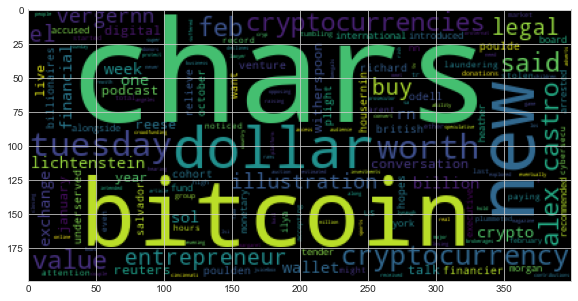

In [167]:
# Generate the Crypto word cloud
wc = WordCloud().generate(' '.join(processed_crypto))
plt.imshow(wc)

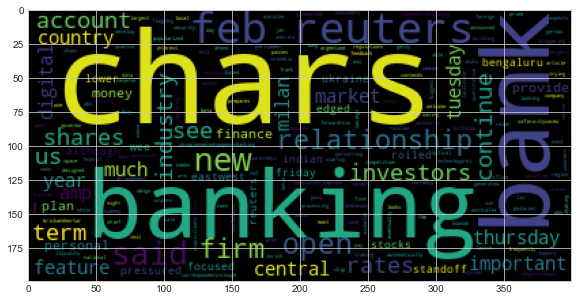

In [168]:
# Generate the Crypto word cloud
wc = WordCloud().generate(' '.join(processed_open))
plt.imshow(wc)

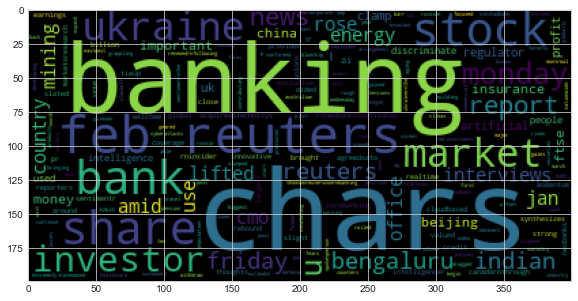

In [169]:
# Generate the Crypto word cloud
wc = WordCloud().generate(' '.join(processed_banking))
plt.imshow(wc)

## Presentation Code - Dashboard

We created a dashboard for the presentation. The dashboard was saved as an html. Steps included creating markdown tabs, creating the dashboard, and saving to html.

In [ ]:
markdown_titlepage = """
# FINAL PROJECT: Cryptocurrency, Open Banking, and Traditional Banking Sentiment Analysis
  
Presentation Date: March 5, 2022 
    
Prepared by Rachel and Margee
  
![image](./Images/blockchainvstraditional.png)

"""

In [ ]:
markdown1 = """
# Evolution of Banking
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown2 = """
# How blockchain technology and partnering with Fintechs is improving banking
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown3 = """
# Bank Use Cases  
- Cattle tracking with blockchain
- Bank crypto custody services
- JP in the metaverse
- Visa/MC offering crypto conversion
- TassatPay/Network
- USDF Consortium
- CBDCs
  
![image](./Images/XX.png)
"""

In [ ]:
markdown4 = """
# Banks currently using blockchain technology
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown5 = """
# Risks associated with new technologies in banking  
  
- BSA/AML, KYC
- Fair Lending
- Price risk
- Operational risks

  
![image](./Images/XX.png)
"""

In [ ]:
markdown6 = """
# Benefits of new technologies in banking  
  
- Faster payments
- Regulation/public trust
- Expansion of bank services/customer base
- Financial inclusion
  
![image](./Images/XX.png)
"""

In [ ]:
markdown7 = """
# Project Overview and Hypothesis  
  
Analyze sentiment across three main concepts: Crypto, Open Banking, and Traditional Banking.  

1. Does the public have a positive, negative, or neutral sentiment surrounding crypto in banking?
2. Does the public have a positive, negative, or neutral sentiment surrounding open banking?
3. Does the public have a positive, negative, or neutral sentiment surrounding traditional banking?
4. How do these three concepts compare (sentiment analysis)?
5. How do our sentiment analysis results compare to AWS Comprehend?

![image](./Images/XX.png)
"""

In [ ]:
markdown8 = """
# What is Crypto vs. Open Banking vs. Traditional Banking
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown9 = """
# Techniques Used to Accomplish Objective  
  
Utilizing applicable pandas libraries, such as nltk, and AWS Comprehend
  
ADD

 
![image](./Images/XX.png)
"""

In [ ]:
markdown10 = """
# Sentiment Analysis Results
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown11 = """
# Ngrams and Frequency Analysis Results
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown12 = """
# AWS Comprehend Demo
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown13 = """
# Overall Conclusion/Answers to 5 Main Questions/Future of Banking
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
markdown14 = """
# Data Issues/Improvements/Potential Next Steps
  
ADD


  
![image](./Images/XX.png)
"""

In [ ]:
#Create Dashboard
pn.Tabs(
    ("Project 3",markdown_titlepage),
    ("Evolution of Banking",markdown1),
    ("Blockchain/Fintechs",markdown2),
    ("Bank Use Cases",markdown3),
    ("Banks",markdown4),
    ("Risks",markdown5),
    ("Benefits",markdown6),
    ("Project Overview",markdown7),
    ("Background",markdown8),
    ("Techniques",markdown9),
    ("Sentiment Analysis",markdown10),
    ("Ngrams/Frequency Analysis",markdown111),
    ("AWS Demo",markdown12),
    ("Conclusion",markdown13),
    ("Data Issues",markdown14)
       )

In [ ]:
#Create an html of the dashboard for presentation purposes once finalized
pn.Tabs(
    ("Project 3",markdown_titlepage),
    ("Evolution of Banking",markdown1),
    ("Blockchain/Fintechs",markdown2),
    ("Bank Use Cases",markdown3),
    ("Banks",markdown4),
    ("Risks",markdown5),
    ("Benefits",markdown6),
    ("Project Overview",markdown7),
    ("Background",markdown8),
    ("Techniques",markdown9),
    ("Sentiment Analysis",markdown10),
    ("Ngrams/Frequency Analysis",markdown111),
    ("AWS Demo",markdown12),
    ("Conclusion",markdown13),
    ("Data Issues",markdown14)
       ).save("Project3_Presentation.html", embed=True)